## Exploratory Data Analysis

Loading all the data we have and merging it into one DataFrame for further analysis.

In [49]:
import pandas as pd

In [61]:
SELECTED_COUNTRIES = ["USA", "GBR", "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

df_tertiary = pd.read_csv("data/out/owd_education_tertiary_completion_rate.csv")
df_gpd_edu = pd.read_csv("data/out/owd_education_government_expenditure_gdp.csv")
df_nobel = pd.read_csv("data/out/nobel_laureates.csv")
df_patents = pd.read_csv("data/out/wipo_patents.csv")
df_clio = pd.read_csv("data/out/all_clio_data.csv")

# df_clio = df_clio.loc[:, ~df_clio.columns.str.contains('^Unnamed')]

merged_df = pd.merge(df_tertiary, df_gpd_edu, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_nobel, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_patents, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_clio, on=["YEAR", "COUNTRYCODE"], how="outer")

# merged_df.fillna(0, inplace=True)
merged_df


# duplicates = merged_df.groupby(['YEAR', 'COUNTRYCODE']).size().reset_index(name='count')
# duplicates = duplicates[duplicates['count'] > 1]
# print(duplicates)

# merged_df[(merged_df['YEAR'] == 1884) & (merged_df['COUNTRYCODE'] == 'BEL')]



COUNTRYCODE  YEAR  TERTIARYCOMPLETIONRATE  EDUCATIONGDPSHARE  \
0              AFG  1500                     NaN                NaN   
1              AGO  1500                     NaN                NaN   
2              ALB  1500                     NaN                NaN   
3              AND  1500                     NaN                NaN   
4              ARE  1500                     NaN                NaN   
...            ...   ...                     ...                ...   
100861         VNM  2040                    19.1                NaN   
100862         YEM  2040                    18.7                NaN   
100863         ZAF  2040                    16.5                NaN   
100864         ZMB  2040                     2.2                NaN   
100865         ZWE  2040                     5.5                NaN   

        NOBELLAUREATES  PATENTFILINGS  ARMEDCONFLICTSINTERNAL  \
0                  NaN            NaN                     0.0   
1                  NaN            NaN                     0.0   
2                  NaN            NaN                     0.0   
3                  NaN            NaN                     0.0   
4                  NaN            NaN                     0.0   
...                ...            ...                     ...   
100861             NaN            NaN                     NaN   
100862             NaN            NaN                     NaN   
100863             NaN            NaN                     NaN   
100864             NaN            NaN                     NaN   
100865             NaN            NaN                     NaN   

        ARMEDCONFLICTSINTERNATIONAL  AVERAGEYEARSOFEDUCATION  \
0                               0.0                      NaN   
1                               0.0                      NaN   
2                               0.0                      NaN   
3                               0.0                      NaN   
4                               0.0                      NaN   
...                             ...                      ...   
100861                          NaN                      NaN   
100862                          NaN                      NaN   
100863                          NaN                      NaN   
100864                          NaN                      NaN   
100865                          NaN                      NaN   

        BOOKTITLESPERCAPITA  ...  POLYARCHY  \
0                       NaN  ...        NaN   
1                       NaN  ...        NaN   
2                       NaN  ...        NaN   
3                       NaN  ...        NaN   
4                       NaN  ...        NaN   
...                     ...  ...        ...   
100861                  NaN  ...        NaN   
100862                  NaN  ...        NaN   
100863                  NaN  ...        NaN   
100864                  NaN  ...        NaN   
100865                  NaN  ...        NaN   

        REGULATIONOFCHIEFEXECUTIVERECRUITMENTXRREG  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
100861                                         NaN   
100862                                         NaN   
100863                                         NaN   
100864                                         NaN   
100865                                         NaN   

        REGULATIONOFPARTICIPATIONPARREG  SOCIALSPENDING  \
0                                   NaN             NaN   
1                                   NaN             NaN   
2                                   NaN             NaN   
3                                   NaN             NaN   
4                                   NaN             NaN   
...                                 

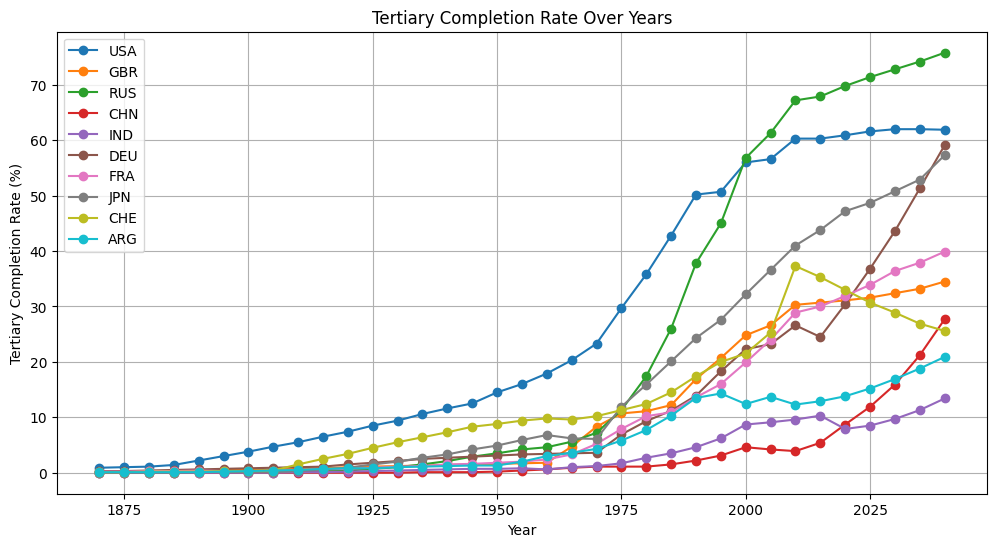

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in SELECTED_COUNTRIES:
    country_data = df_tertiary[df_tertiary['COUNTRYCODE'] == country]
    plt.plot(country_data['YEAR'], country_data['TERTIARYCOMPLETIONRATE'], label=country, marker='o')

plt.title('Tertiary Completion Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Tertiary Completion Rate (%)')
plt.legend()
plt.grid()
plt.show()


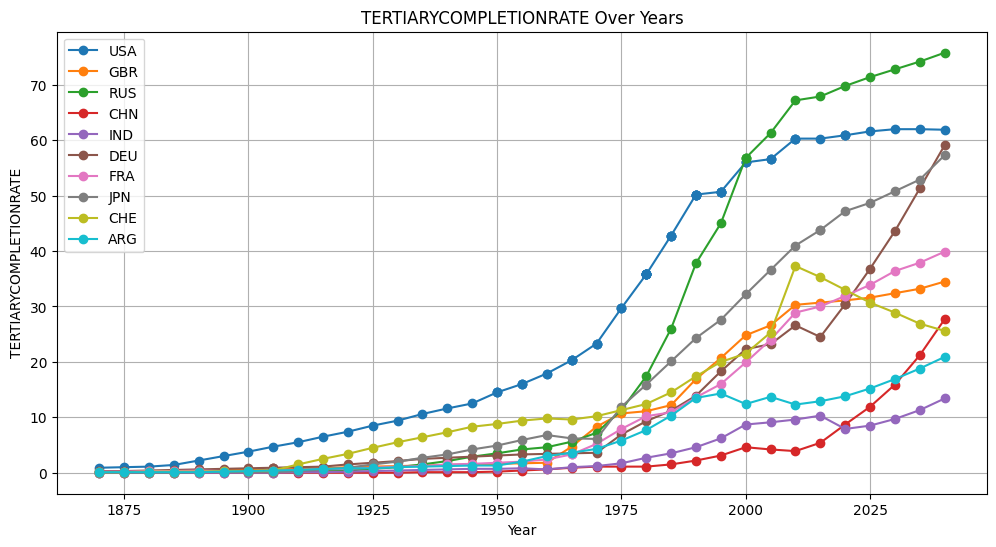

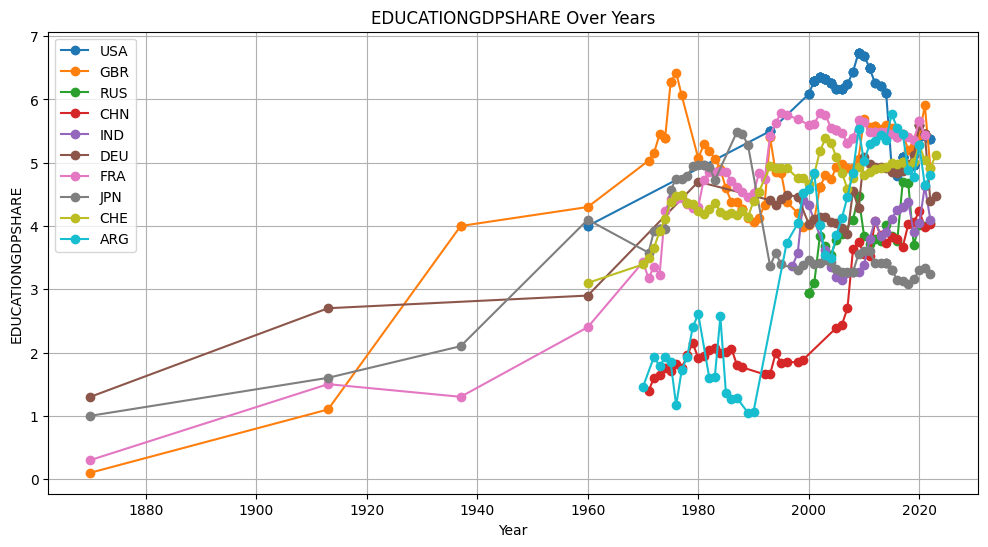

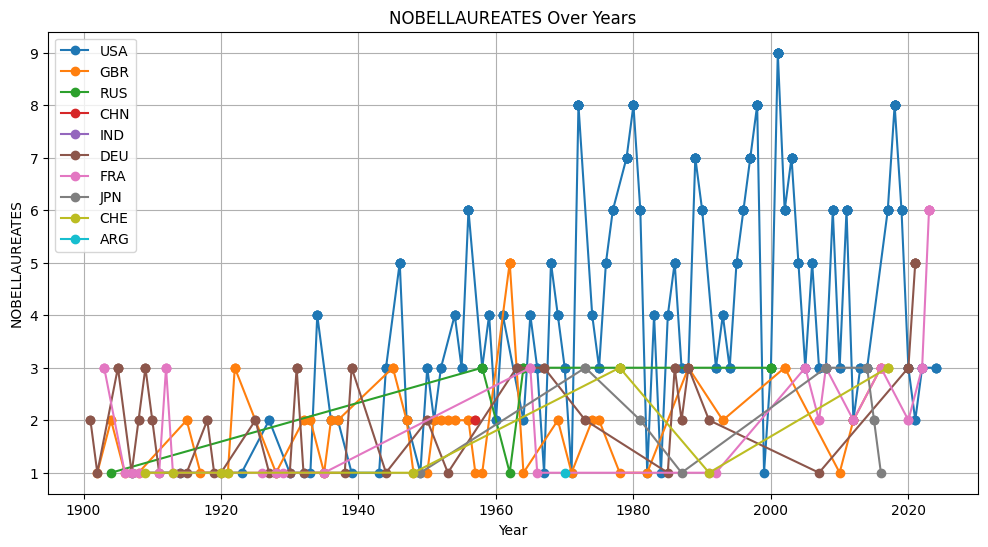

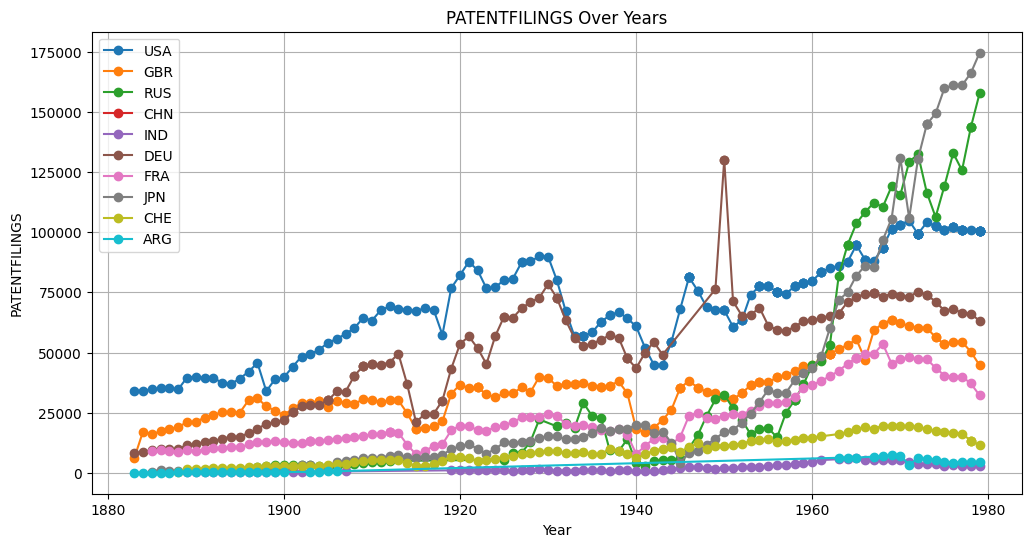

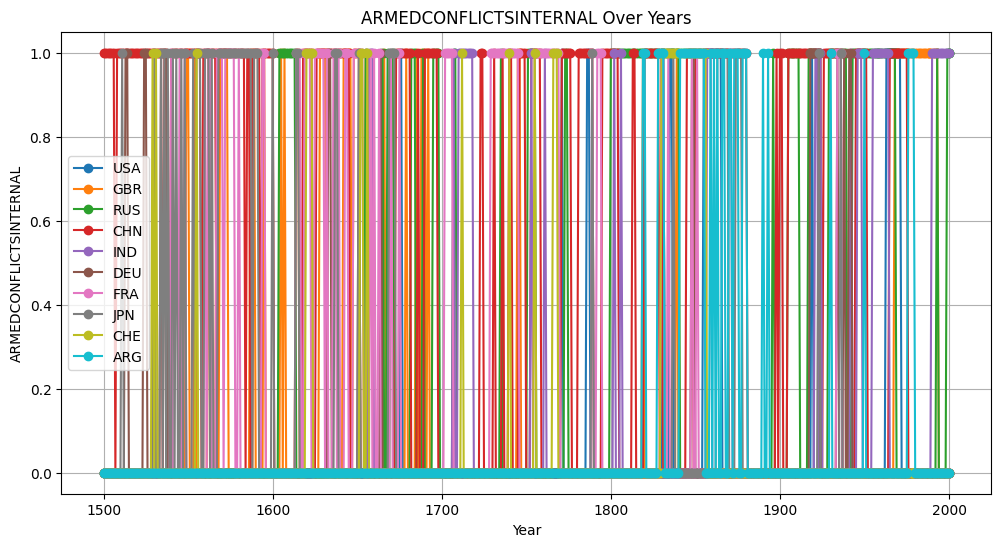

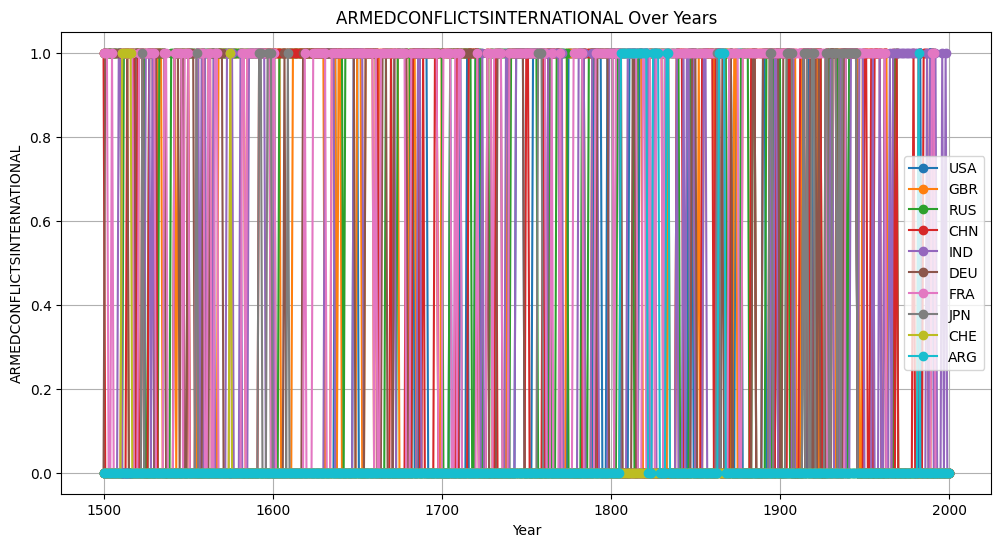

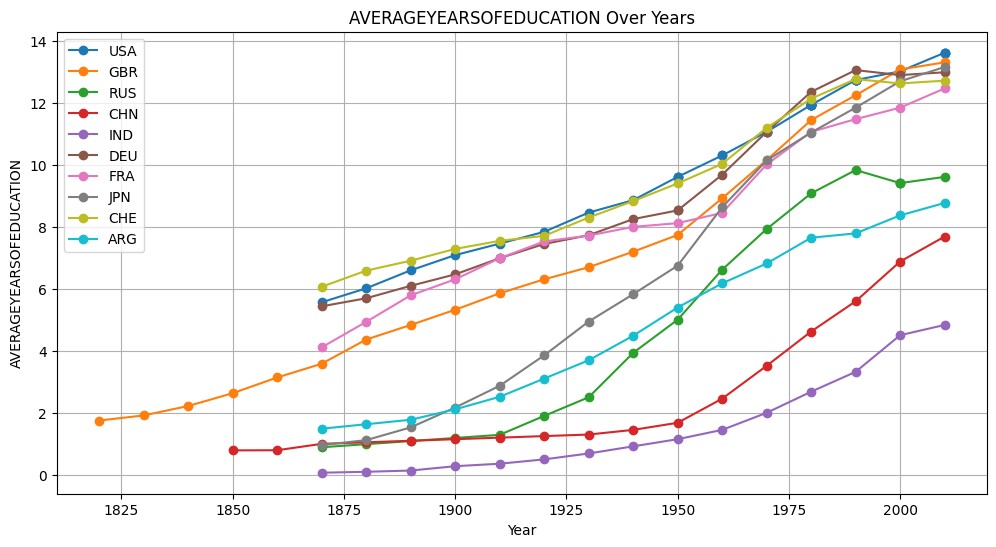

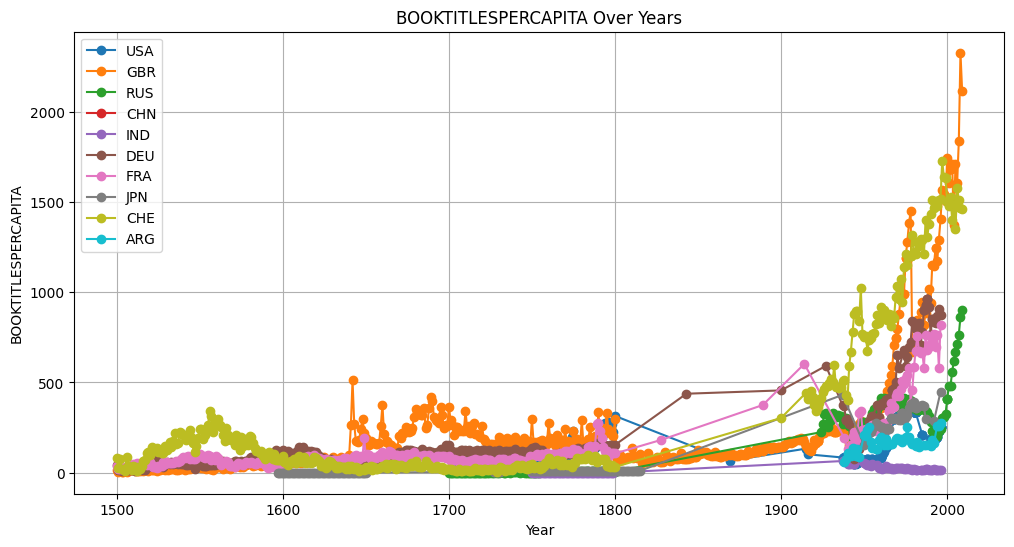

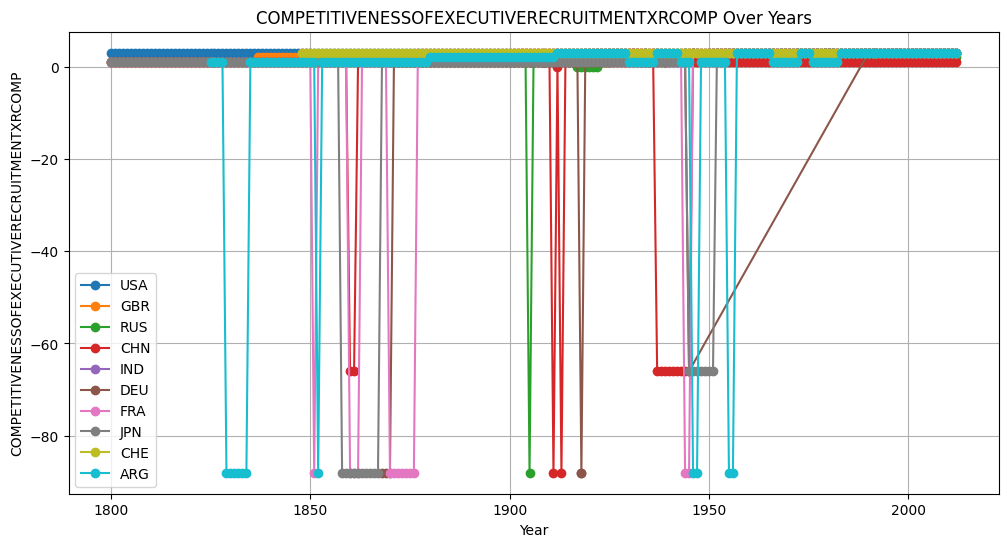

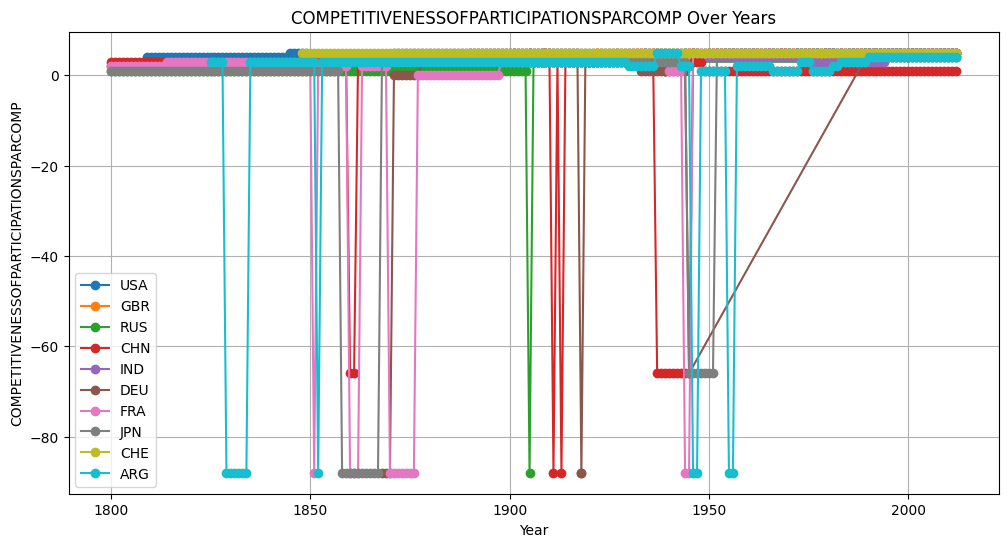

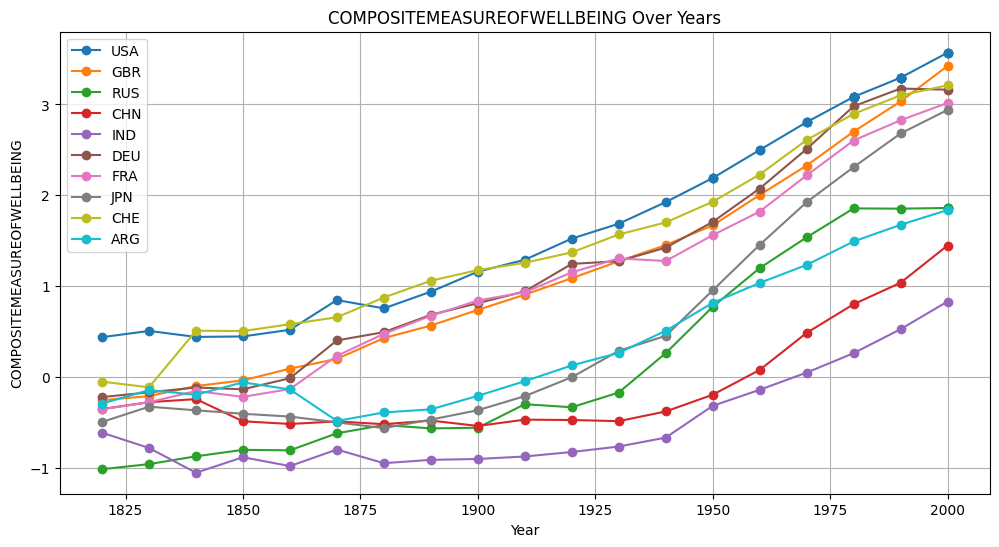

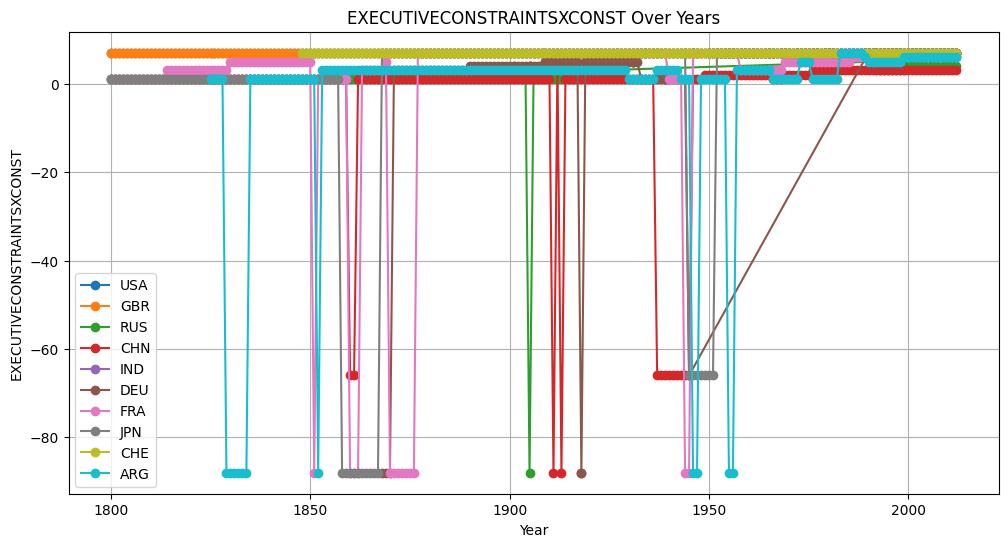

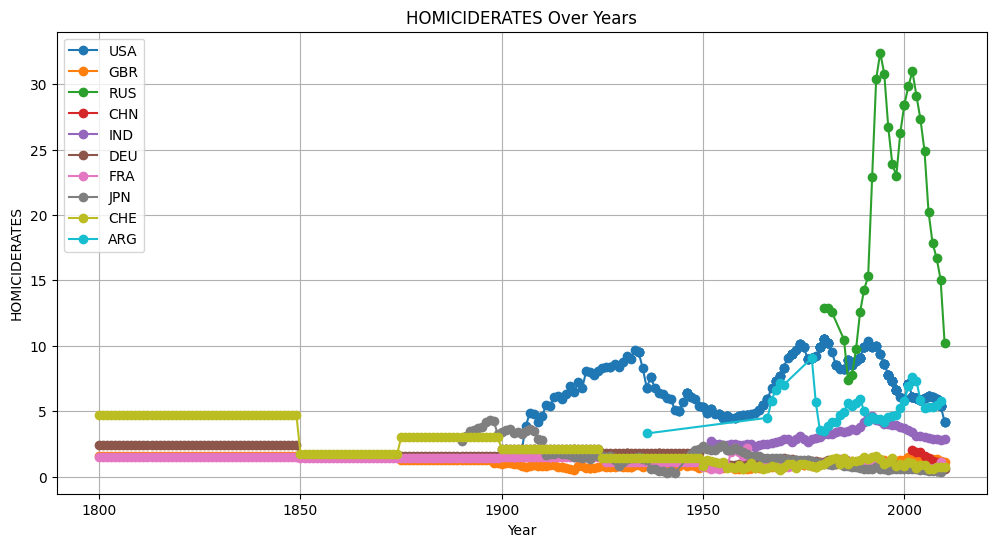

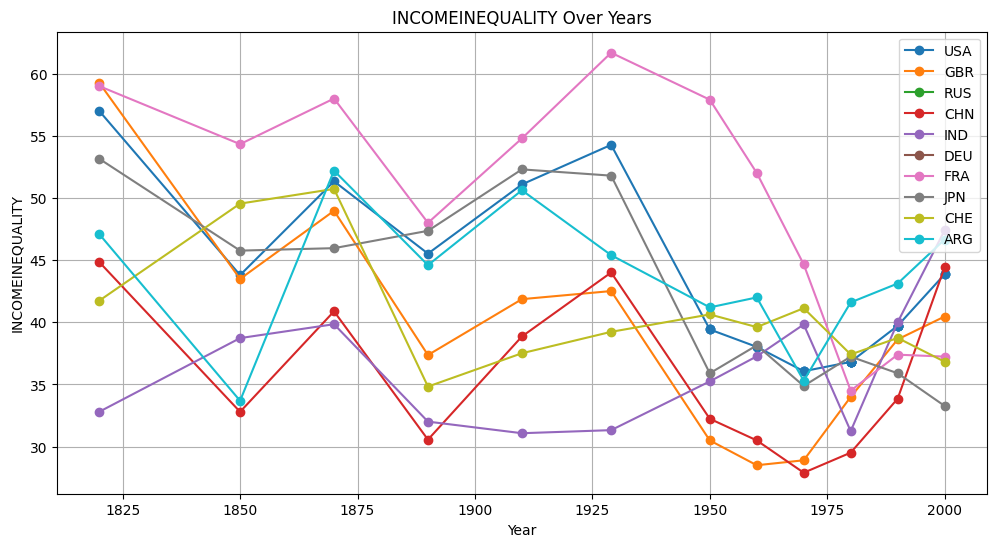

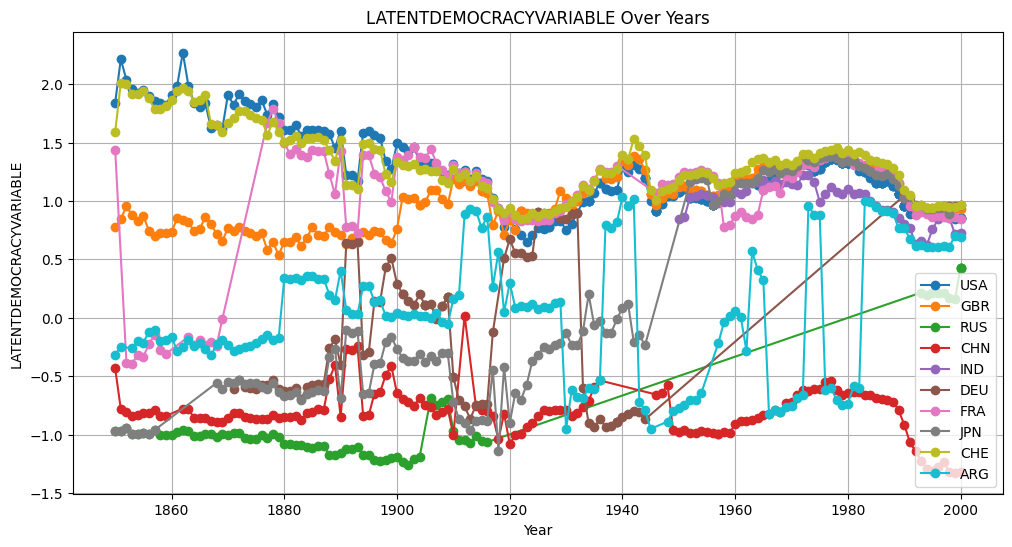

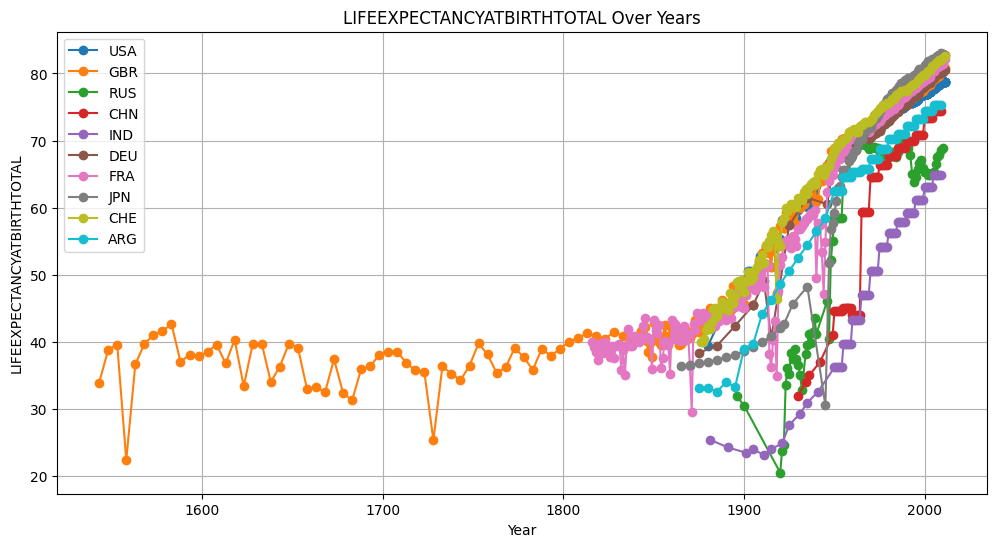

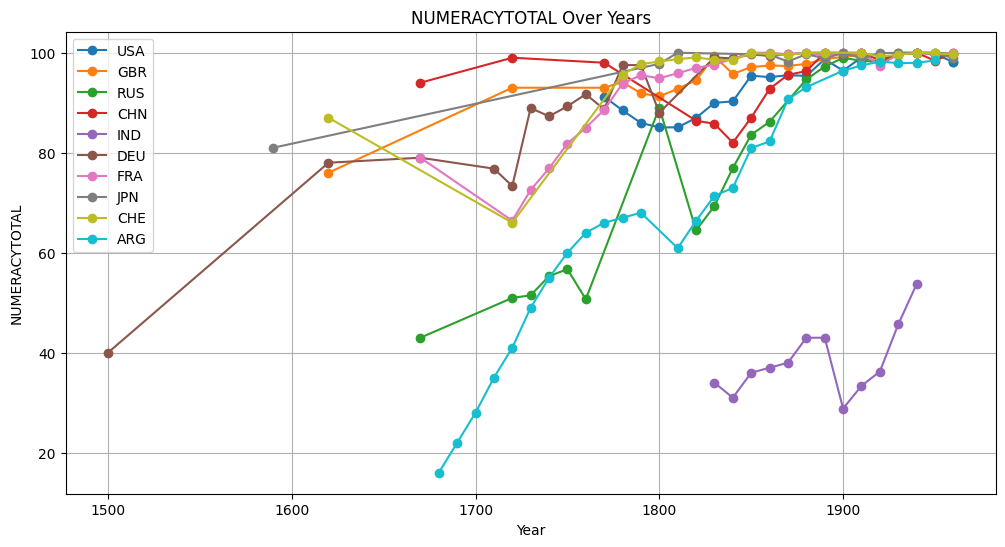

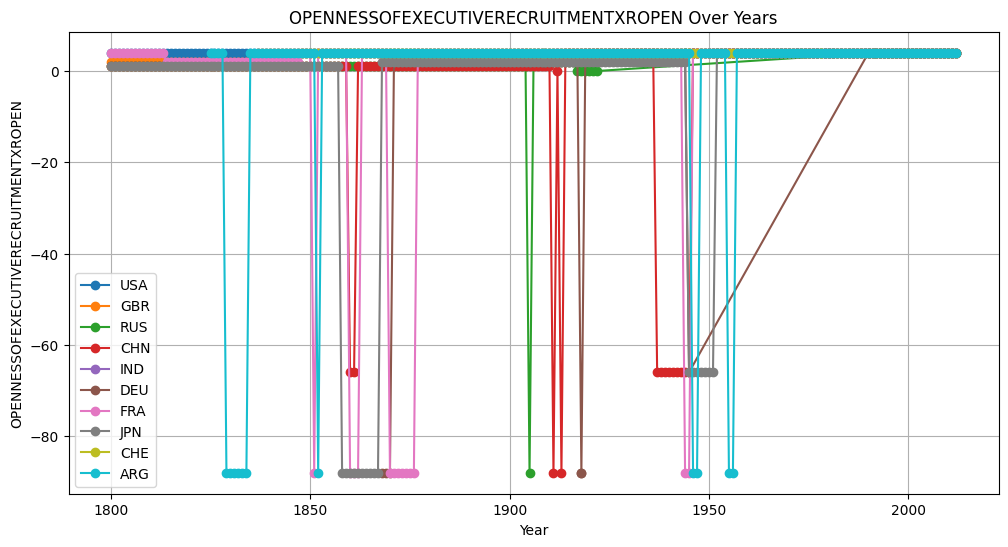

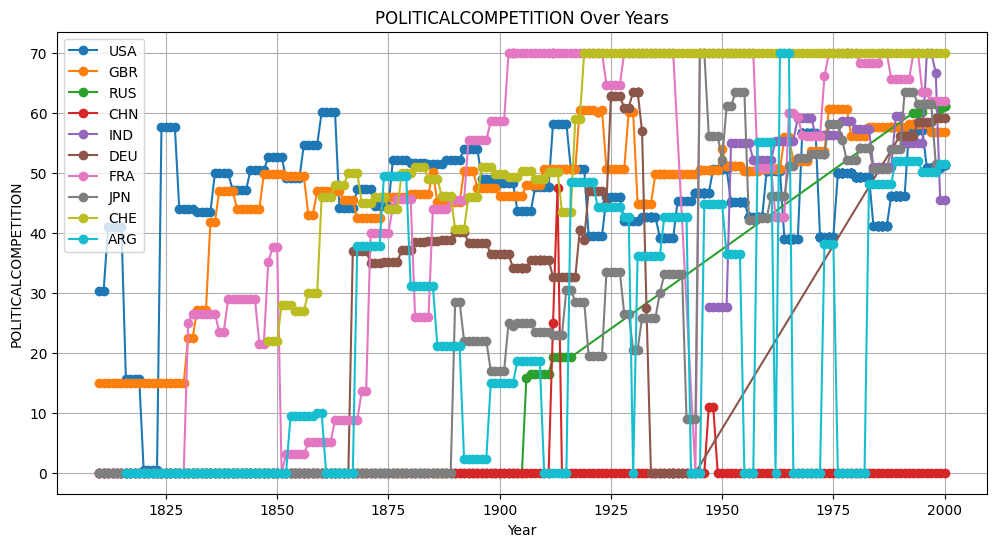

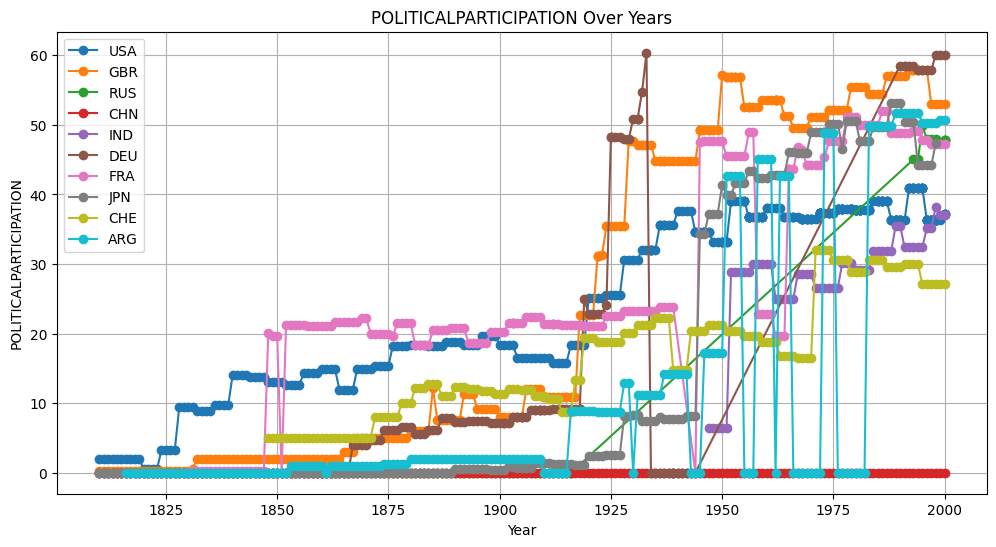

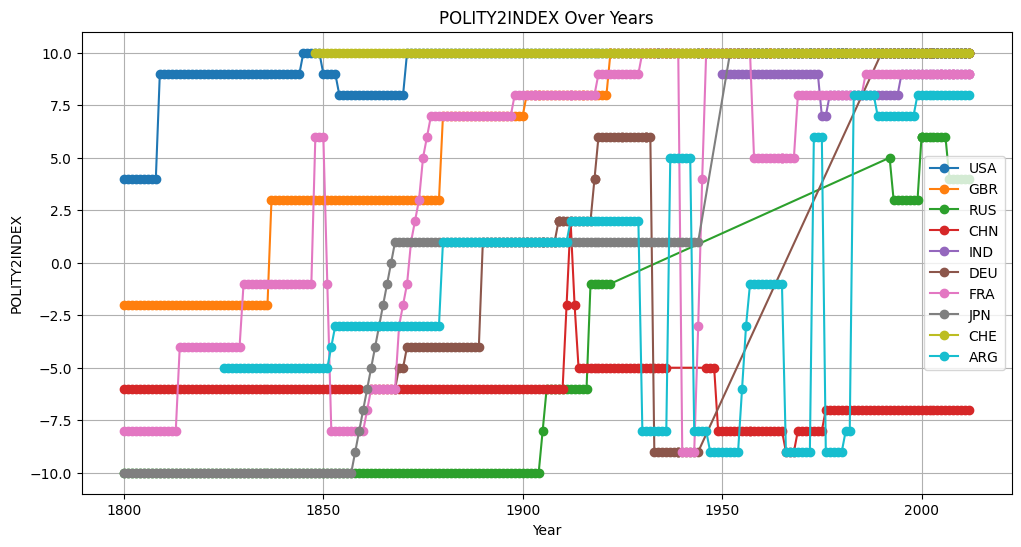

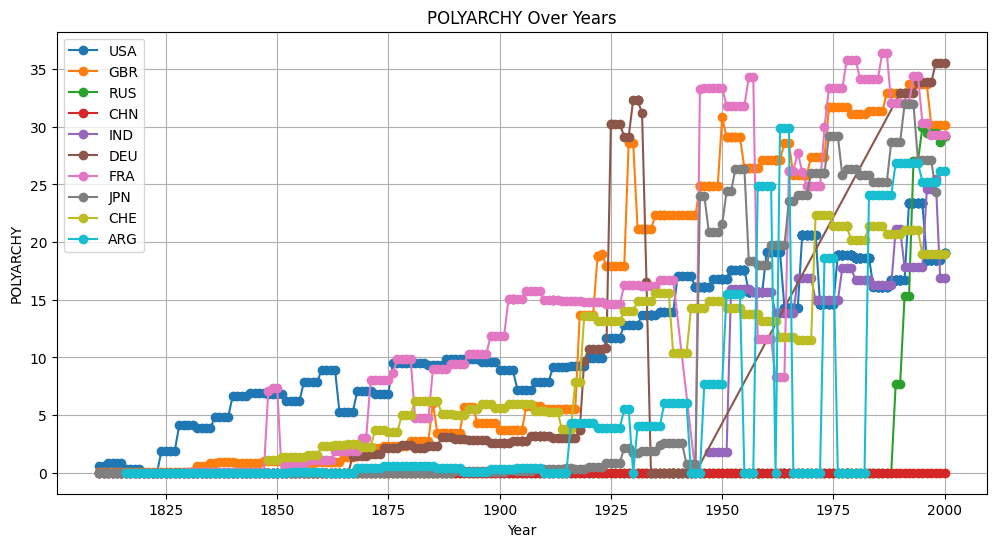

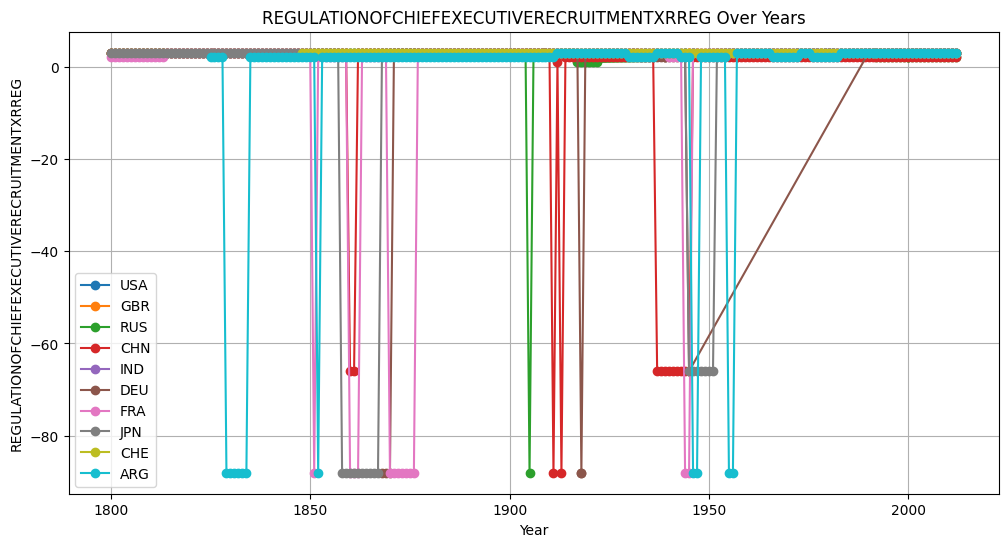

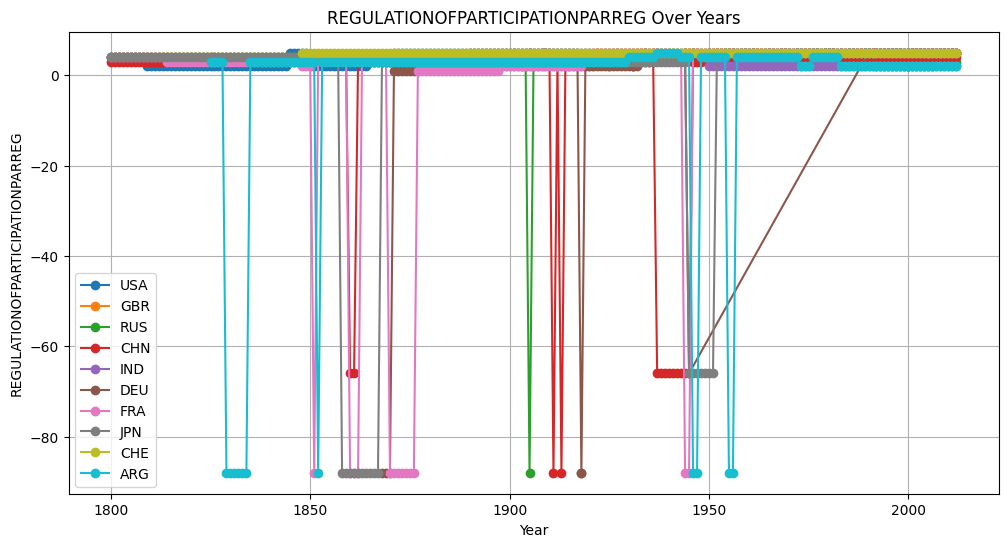

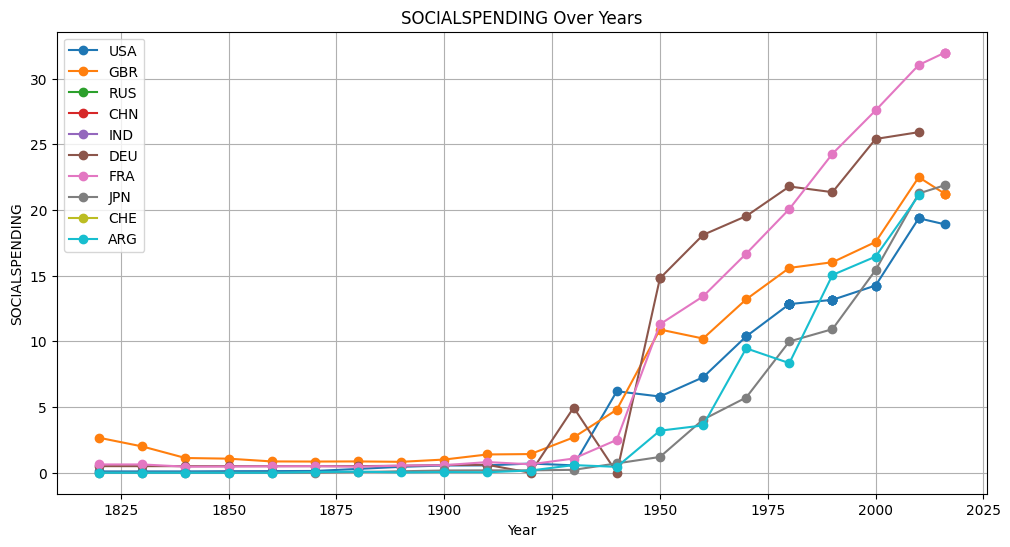

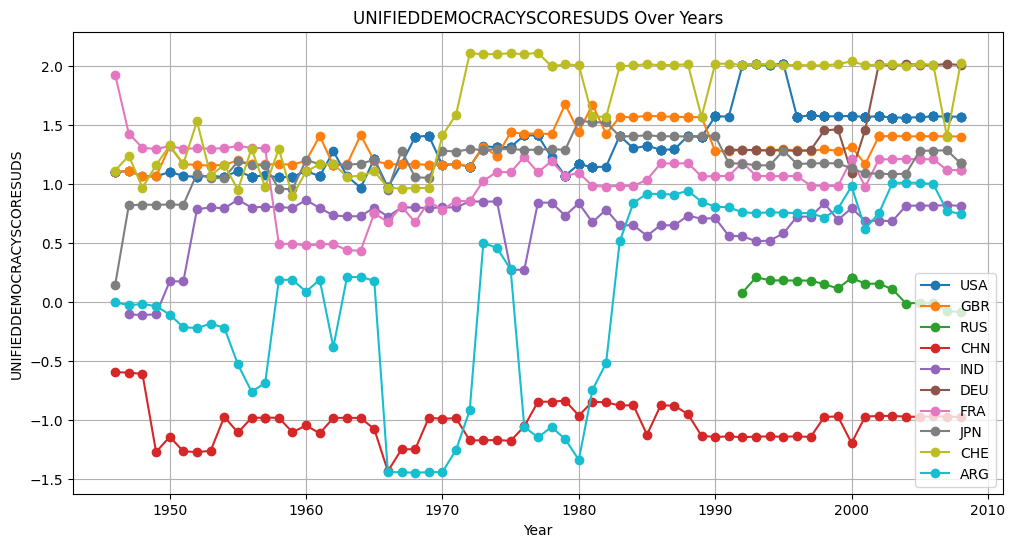

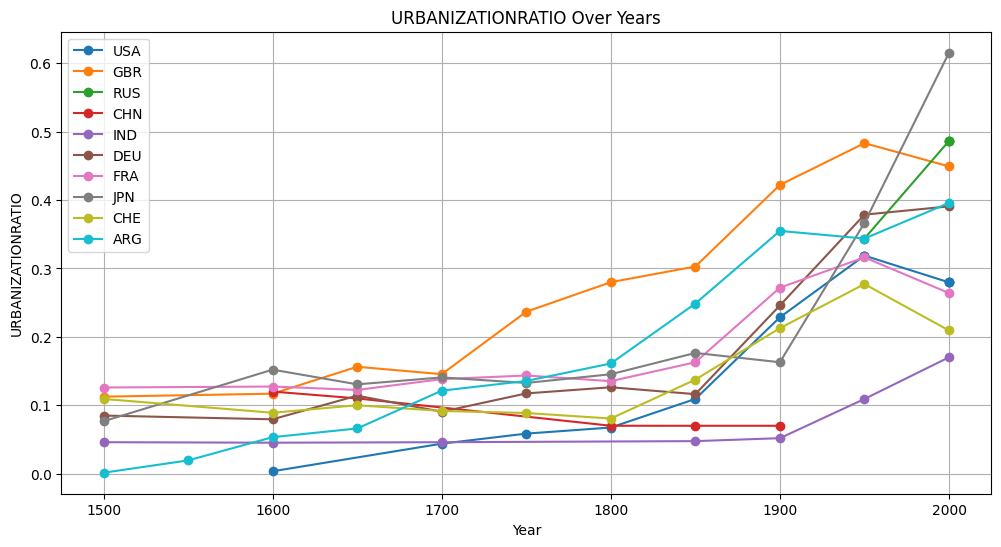

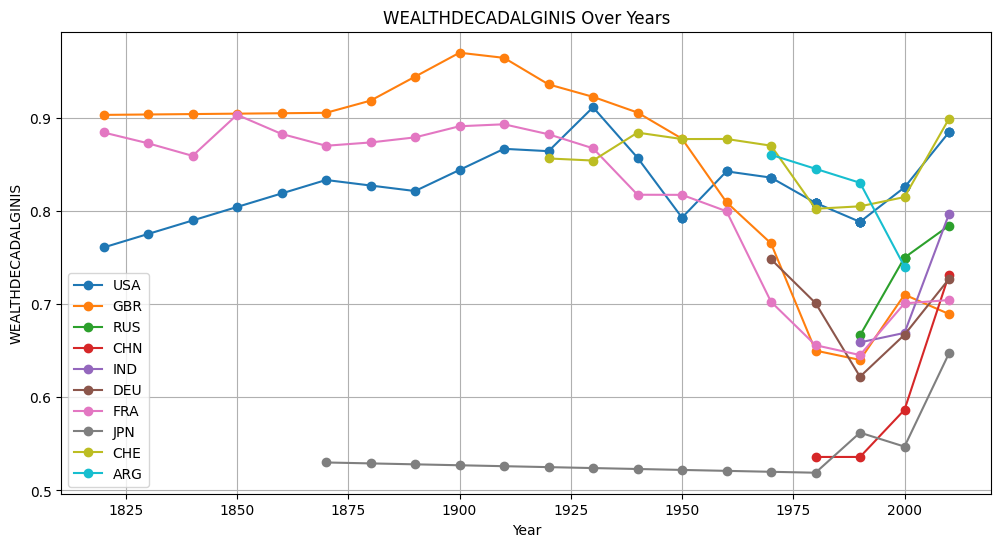

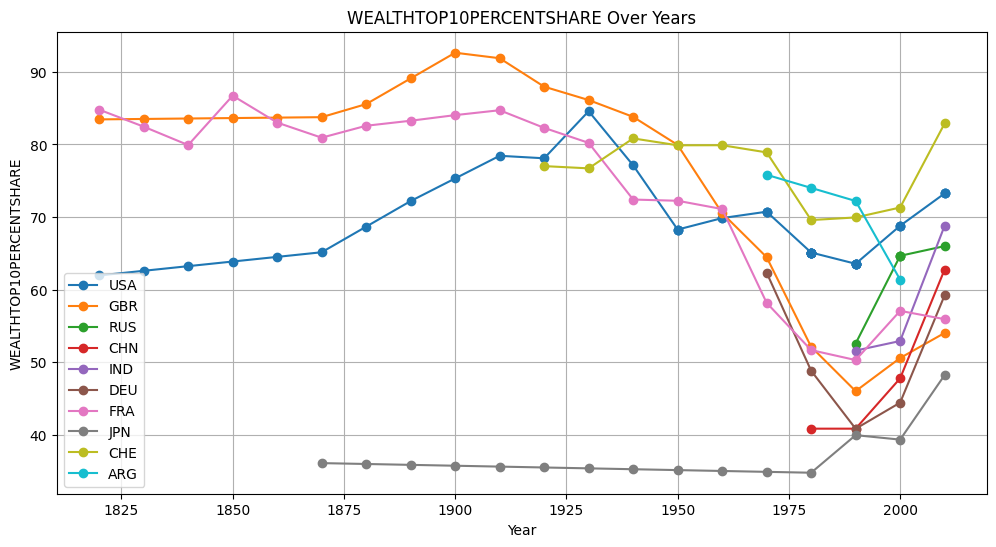

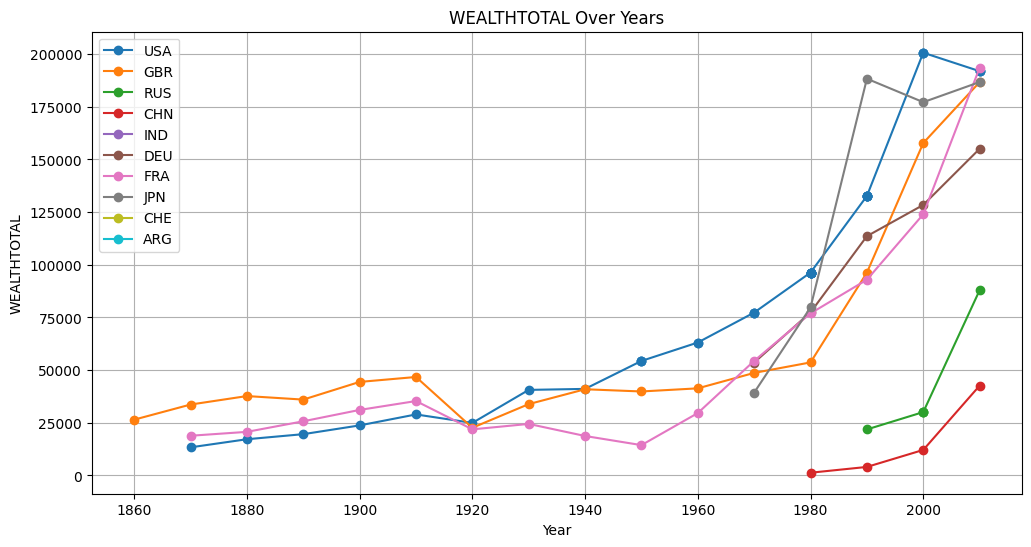

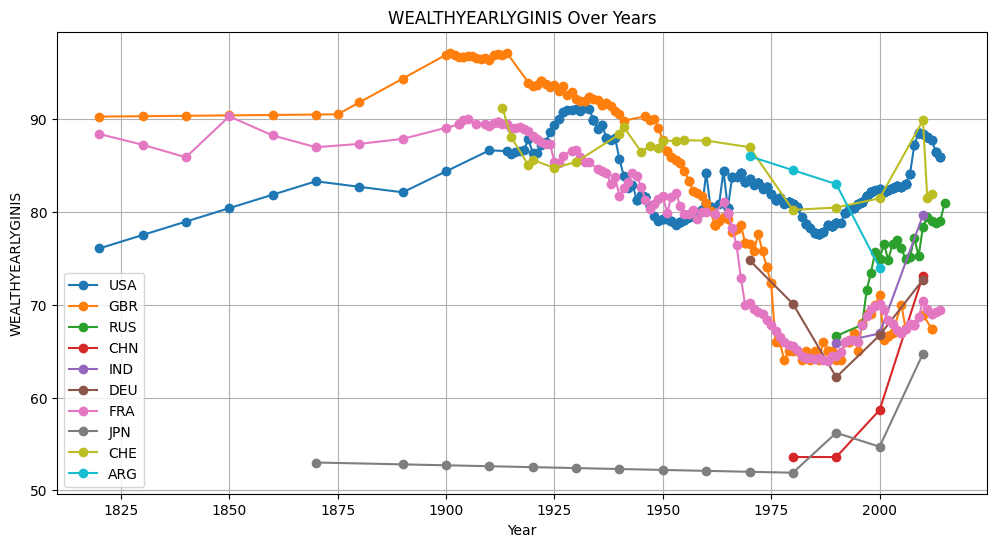

In [63]:
import matplotlib.pyplot as plt

for column in merged_df.columns:
    if column not in ['YEAR', 'COUNTRYCODE']:  # Exclude non-numeric columns
        plt.figure(figsize=(12, 6))
        for country in SELECTED_COUNTRIES:
            country_data = merged_df[merged_df['COUNTRYCODE'] == country].dropna(subset=[column])
            plt.plot(country_data['YEAR'], country_data[column], label=country, marker='o')
        plt.title(f'{column} Over Years')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.legend()
        plt.grid()
        plt.show()
